In [15]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'    # Update with your actual path

In [16]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/camel')))
print(len(os.listdir('/content/drive/MyDrive/train/horse')))
print(len(os.listdir('/content/drive/MyDrive/test/camel')))
print(len(os.listdir('/content/drive/MyDrive/test/horse')))

144
144
20
20


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
8/8 [==============================] - 56s 6s/step - loss: 1.2061 - accuracy: 0.5172 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 38s 5s/step - loss: 0.6842 - accuracy: 0.5517 - val_loss: 0.6733 - val_accuracy: 0.6429
Epoch 3/30
8/8 [==============================] - 41s 5s/step - loss: 0.6405 - accuracy: 0.6595 - val_loss: 0.6009 - val_accuracy: 0.6964
Epoch 4/30
8/8 [==============================] - 50s 6s/step - loss: 0.5571 - accuracy: 0.6940 - val_loss: 0.5482 - val_accuracy: 0.7500
Epoch 5/30
8/8 [==============================] - 54s 7s/step - loss: 0.5267 - accuracy: 0.7155 - val_loss: 0.5442 - val_accuracy: 0.7143
Epoch 6/30
8/8 [==============================] - 54s 7s/step - loss: 0.4065 - accuracy: 0.8190 - val_loss: 0.5844 - val_accuracy: 0.6964
Epoch 7/30
8/8 [==============================] - 40s 5s/step - loss: 0.3537 - accuracy: 0.8362 - val_loss: 0.6983 - val_accuracy: 0.7143
Epoch 8/30
8/8 [==================

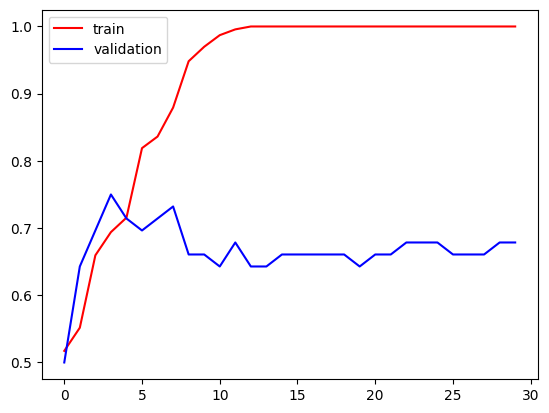

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

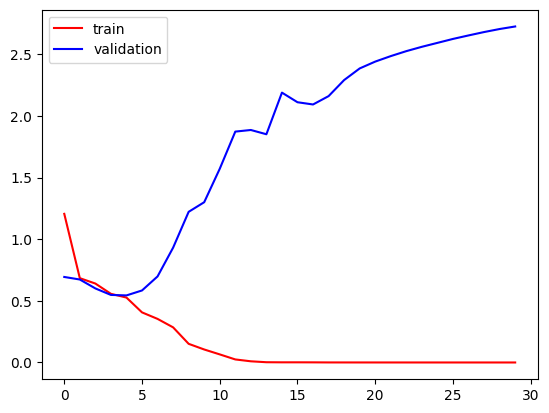

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 40 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

2/2 [==============================] - 3s 890ms/step
[[4.5928678e-06]
 [4.3906363e-13]
 [3.4981429e-05]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.4109702e-01]
 [1.0000000e+00]
 [9.6993732e-01]
 [6.6385984e-02]
 [1.8645185e-05]
 [1.2604314e-01]
 [2.3505007e-05]
 [9.9999976e-01]
 [4.3631979e-04]
 [4.8921847e-05]
 [1.4280740e-12]
 [5.6814924e-02]
 [9.9999934e-01]
 [2.6340568e-03]
 [9.9655491e-01]
 [1.6992349e-06]
 [2.6664329e-06]
 [9.7390480e-02]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.7470134e-02]
 [2.7474316e-05]
 [7.1907992e-04]
 [8.1159742e-06]
 [1.3504826e-05]
 [1.2347303e-01]
 [1.6060895e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.1991249e-13]
 [7.0296896e-10]
 [1.9510338e-01]
 [1.0000000e+00]
 [9.4275224e-01]
 [8.2457113e-08]]


In [13]:
len(predictions)

40

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[12  8]
 [14  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.60      0.52        20
           1       0.43      0.30      0.35        20

    accuracy                           0.45        40
   macro avg       0.45      0.45      0.44        40
weighted avg       0.45      0.45      0.44        40

